Кусрсовой проект по курсу: Библиотеки Python для Data Science: продолжение

Подключаем всё что надо

In [ ]:
import random
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from catboost import CatBoost, CatBoostClassifier, cv, Pool
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rcParams.update({'font.size': 14})
sns.set(rc={"figure.figsize":(12, 6)})
sns.set(font_scale = 1.3)
random.seed(1)

Файлы

In [3]:
TRAINING_DATASET_PATH = 'train.csv'
VALIDATION_DATASET_PATH = 'test.csv'
PREDICTION_PATH = 'submission.csv'
PREPARED_DATASET_PATH_TRAIN = 'credit_prepared_train.csv'
PREPARED_DATASET_PATH_TEST = 'credit_prepared_test.csv'
SAMPLE_SUBMISSION_PATH = 'sample_submission.csv'

In [4]:
original_train_df = pd.read_csv(TRAINING_DATASET_PATH)
validation_df = pd.read_csv(VALIDATION_DATASET_PATH)

In [5]:
original_train_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [6]:
original_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [7]:
validation_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [8]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

Уменьшаем размер занимаемой памяти

In [9]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [10]:
original_train_df = reduce_mem_usage(original_train_df)

Memory usage of dataframe is 0.97 MB
Memory usage after optimization is: 0.38 MB
Decreased by 60.9%


In [11]:
original_train_df.dtypes

Home Ownership                  category
Annual Income                    float32
Years in current job            category
Tax Liens                        float32
Number of Open Accounts          float32
Years of Credit History          float32
Maximum Open Credit              float32
Number of Credit Problems        float32
Months since last delinquent     float32
Bankruptcies                     float32
Purpose                         category
Term                            category
Current Loan Amount              float32
Current Credit Balance           float32
Monthly Debt                     float32
Credit Score                     float32
Credit Default                      int8
dtype: object

In [12]:
validation_df = reduce_mem_usage(validation_df)

Memory usage of dataframe is 0.31 MB
Memory usage after optimization is: 0.13 MB
Decreased by 58.9%


In [13]:
validation_df.dtypes

Home Ownership                  category
Annual Income                    float32
Years in current job            category
Tax Liens                        float32
Number of Open Accounts          float32
Years of Credit History          float32
Maximum Open Credit              float32
Number of Credit Problems        float32
Months since last delinquent     float32
Bankruptcies                     float32
Purpose                         category
Term                            category
Current Loan Amount              float32
Current Credit Balance           float32
Monthly Debt                     float32
Credit Score                     float32
dtype: object

In [14]:
TARGET_NAME = 'Credit Default'
CAT_FEATURE_NAMES = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']

Text(0.5, 1.0, 'Распределение целевой переменной')

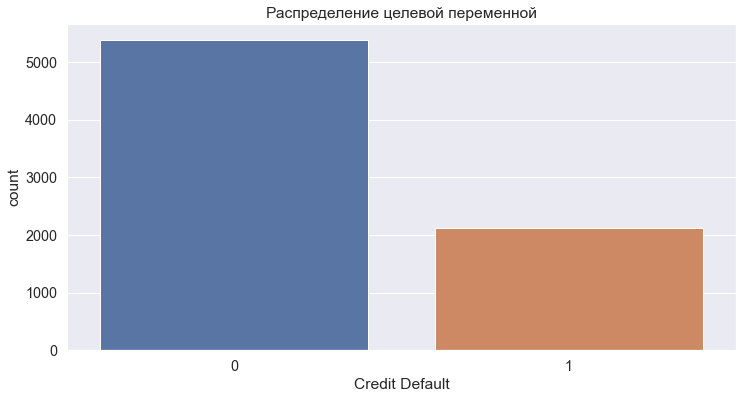

In [15]:
sns.countplot(x=original_train_df['Credit Default'])
plt.title('Распределение целевой переменной')

In [16]:
original_train_df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.0000,3419.000000,7486.000000,7500.0,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366390e+06,0.030133,11.130934,18.317446,9.451526e+05,0.1700,34.692600,0.117152,11873135.0,2.898332e+05,18314.453125,1151.087524,0.281733
std,8.453384e+05,0.271613,4.908937,7.041938,1.602614e+07,0.4986,21.688801,0.347197,31926302.0,3.178713e+05,11926.758789,1604.447510,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.0000,0.000000,0.000000,11242.0,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.0000,16.000000,0.000000,180169.0,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.0000,32.000000,0.000000,309573.0,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.799999,7.935015e+05,0.0000,50.000000,0.000000,519882.0,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700001,1.304726e+09,7.0000,118.000000,4.000000,100000000.0,6.506797e+06,136679.000000,7510.000000,1.000000


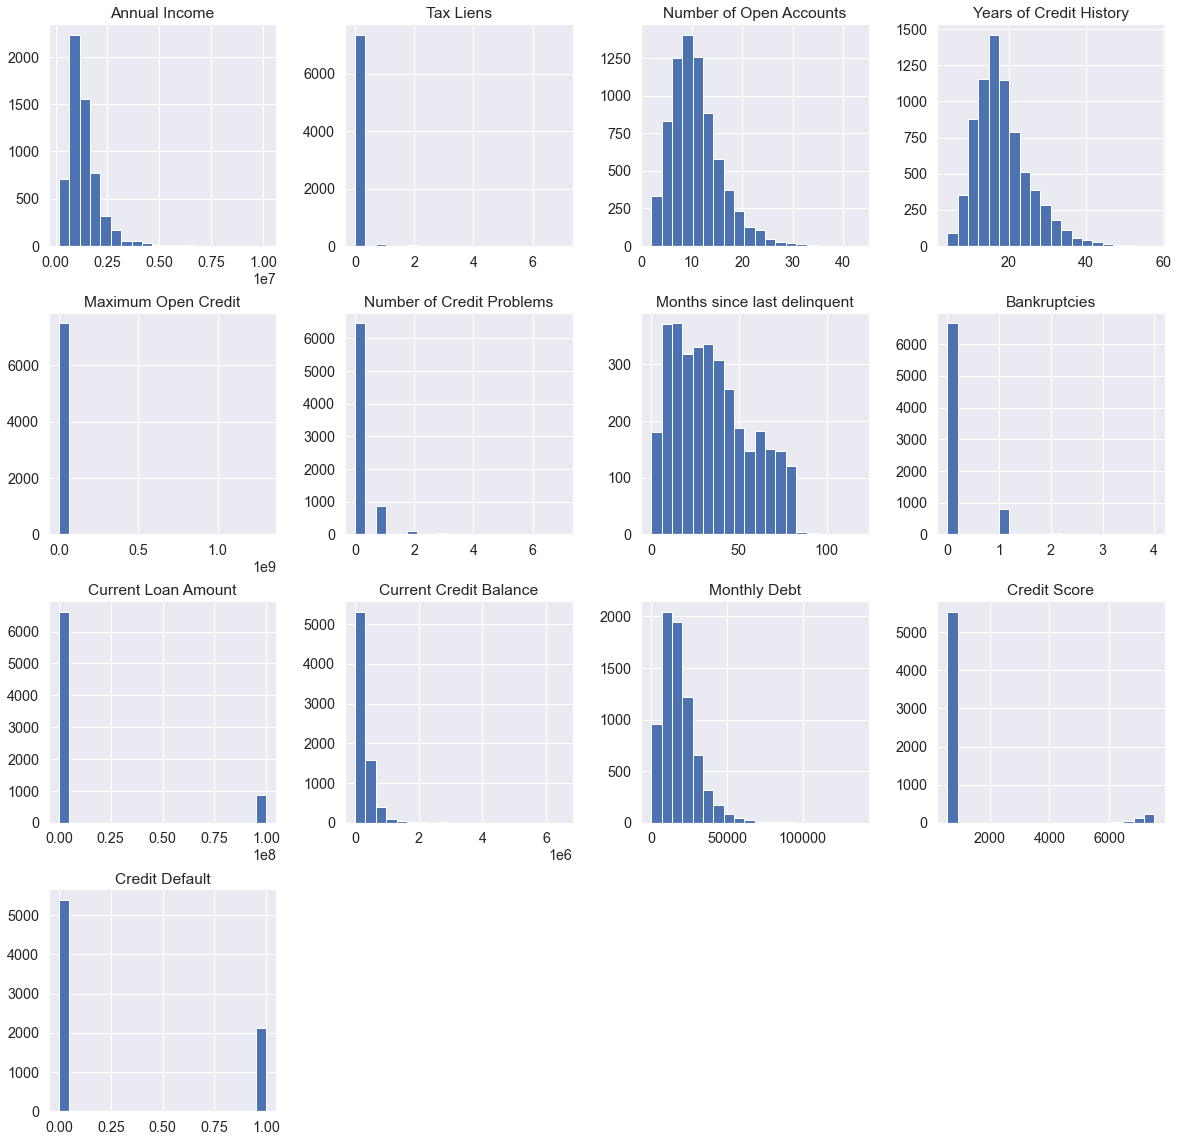

In [17]:
original_train_df.hist(bins = 20, figsize = (20, 20))
plt.show()

In [18]:
for col in original_train_df.select_dtypes(include='category').columns:
    print(str(col) + '\n\n' + str(original_train_df[col].value_counts()) + '\n' + '*' * 40 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64
****************************************

Te

[Text(0.5, 1.0, 'Корреляция признаков')]

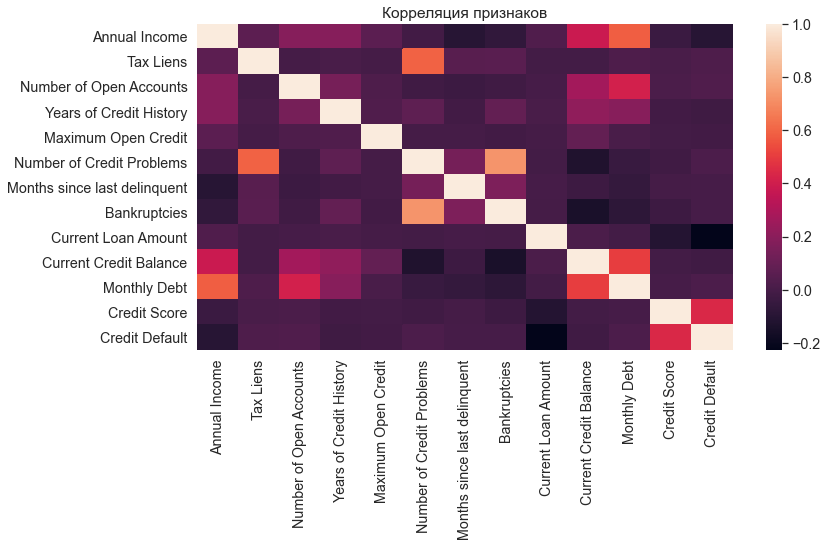

In [19]:
df = original_train_df.select_dtypes(include=['int8', 'float32'])
sns.heatmap(df.corr()).set(title='Корреляция признаков')

Очистка данных

In [20]:
class DataPreprocessor:
    def __init__(self):
        self.medians=None
        self.modes = None
        self.max_score = 850
        self.max_credit = 99999999.0
        
    def fit(self, X):
        """Сохранение статистик""" 
        self.medians = X.median()
        self.modes = X.mode().loc[0]
                
    def transform(self, X):
        """Трансформация данных"""
        X['Annual Income NaN'] = 0
        X.loc[X['Annual Income'].isna(), 'Annual Income NaN'] = 1
        X['Annual Income'].fillna(self.medians['Annual Income'], inplace = True)     
        
        X['Current Loan Amount Outlier'] = 0
        X['Current Loan Amount NaN'] = 0
        X.loc[X['Current Loan Amount'] > self.max_credit, 'Current Loan Amount Outlier'] = 1
        X.loc[X['Current Loan Amount'].isna(), 'Current Loan Amount Nan'] = 1
        X.loc[X['Current Loan Amount'] > self.max_credit, 'Current Loan Amount'] = self.max_credit
       
        X['Maximum Open Credit Outlier'] = 0
        X['Maximum Open Credit NaN'] = 0
        X.loc[X['Maximum Open Credit'] > self.max_credit, 'Maximum Open Credit Outlier'] = 1
        X.loc[X['Maximum Open Credit'].isna(), 'Maximum Open Credit NaN'] = 1
        X.loc[X['Maximum Open Credit'] > self.max_credit, 'Maximum Open Credit'] = self.max_credit
        
        X['Years in current job NaN'] = 0
        X.loc[X['Years in current job'].isna(), 'Years in current job NaN'] = 1
        X['Years in current job'].fillna(self.modes['Years in current job'], inplace = True)
        

        X.drop('Months since last delinquent', axis=1, inplace=True)
        
        X['Credit Score Outlier'] = 0
        X['Credit Score NaN'] = 0
        X.loc[X['Credit Score'] > self.max_score, 'Credit Score Outlier'] = 1
        X.loc[X['Credit Score'].isna(), 'Credit Score NaN'] = 1
        X.loc[X['Credit Score'] > self.max_score, 'Credit Score'] = self.max_score
        
        X['Bankruptcies NaN'] = 0
        X.loc[X['Bankruptcies'].isna(), 'Bankruptcies NaN'] = 1
        X['Bankruptcies'].fillna(0, inplace = True)
        
        X.fillna(self.medians, inplace=True)
        
        return X
        

In [21]:
preprocessor = DataPreprocessor()
preprocessor.fit(original_train_df)
original_train_df = preprocessor.transform(original_train_df)
validation_df = preprocessor.transform(validation_df)
original_train_df.shape, validation_df.shape

((7500, 26), (2500, 25))

Генерация новых признаков

In [22]:
class FeatureGenetator():
    """Генерация новых фич"""
    
                  
    def transform(self, X):
        
        # Term
        X['Long Term'] = X['Term'].map({'Long Term': 1, 'Short Term': 0})
        CAT_FEATURE_NAMES.append('Long Term')
                             
        # Years in current job
        X['Years in current job SHORT'] = X['Years in current job'].map({'< 1 year':'novice', 
                                                                       '1 year':'novice', 
                                                                       '2 years':'sophomore', 
                                                                       '3 years':'senior', 
                                                                       '4 years':'senior', 
                                                                       '5 years':'senior', 
                                                                       '6 years':'senior', 
                                                                       '7 years':'senior',
                                                                       '8 years':'senior',
                                                                       '9 years':'senior',
                                                                       '10+ years':'oldtimer'})
        CAT_FEATURE_NAMES.append('Years in current job SHORT')
        
        return X
    

In [23]:
features_gen = FeatureGenetator()
original_train_df = features_gen.transform(original_train_df)
validation_df = features_gen.transform(validation_df)
original_train_df.shape, validation_df.shape

((7500, 28), (2500, 27))

Деление на трейн и тест выборки


In [24]:
X = original_train_df.drop(columns=TARGET_NAME)
y = original_train_df[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((5250, 27), (2250, 27), (5250,), (2250,))

In [25]:
X_train.to_csv(PREPARED_DATASET_PATH_TRAIN, index=False, encoding='utf-8', sep=';')
X_test.to_csv(PREPARED_DATASET_PATH_TEST, index=False, encoding='utf-8', sep=';')

In [26]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [27]:
def evaluate_preds(model, X_train, X_valid, y_train, y_valid):
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

In [28]:
disbalance = y_train.value_counts()[0] / y_train.value_counts()[1]
disbalance

2.6082474226804124

In [29]:
frozen_params = {
     'class_weights':[1, disbalance], 
     'silent':True,
     'random_state':42,
     'cat_features':CAT_FEATURE_NAMES,
     'eval_metric':'F1',
     'early_stopping_rounds':20
}

Построение модели

In [30]:
gb_model = CatBoostClassifier(**frozen_params, iterations=300, max_depth=7)
gb_model.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))
evaluate_preds(gb_model, X_train, X_test, y_train, y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

TRAIN

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      3795
           1       0.46      0.64      0.54      1455

    accuracy                           0.69      5250
   macro avg       0.65      0.68      0.65      5250
weighted avg       0.73      0.69      0.70      5250

TEST

              precision    recall  f1-score   support

           0       0.82      0.70      0.76      1592
           1       0.46      0.62      0.53       658

    accuracy                           0.68      2250
   macro avg       0.64      0.66      0.64      2250
weighted avg       0.71      0.68      0.69      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1119  473
1                252  406


Оцениваем значимость признаков

In [31]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances

,feature_name,importance
11,Current Loan Amount,36.216058
16,Credit Score Outlier,27.434561
14,Credit Score,24.970215
25,Long Term,2.569344
10,Term,2.521595
15,Annual Income NaN,2.082608
6,Maximum Open Credit,1.186643
1,Annual Income,1.104670
4,Number of Open Accounts,0.869690
13,Monthly Debt,0.614526


Формируем файл с предсказаниями

In [32]:
predictions = gb_model.predict(validation_df)
predictions.shape

(2500,)

In [33]:
submission = pd.read_csv(SAMPLE_SUBMISSION_PATH)
submission.shape

(2500, 2)

In [34]:
submission['Credit Default'] = predictions
submission.head()

,Id,Credit Default
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0


In [35]:
submission.to_csv('my_submission.csv', index=False)